In [2]:
is_colab = 'google.colab' in str(get_ipython())

In [3]:
if is_colab:
    !git clone https://github.com/davidfague/Neural-Modeling.git
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/

Cloning into 'Neural-Modeling'...
remote: Enumerating objects: 993, done.
remote: Counting objects: 100% (550/550), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 993 (delta 356), reused 433 (delta 284), pack-reused 443
Receiving objects: 100% (993/993), 8.43 MiB | 15.12 MiB/s, done.
Resolving deltas: 100% (627/627), done.
Mounted at /content/drive
/content/drive/MyDrive


In [5]:
if is_colab:
    %cd /content/Neural-Modeling

import numpy as np
import matplotlib.pyplot as plt
from Modules.segment import SegmentManager

/content/Neural-Modeling


In [6]:
output_folder = '/content/drive/MyDrive/L5PCtemplate[0]_50e-1Hz_196nseg_2000ms_108nbranch_29068NCs_29068nsyn'
dt = 0.1

sm = SegmentManager(output_folder, dt = dt)

In [7]:
threshold = 0.003 / 1000
ms_within_somatic_spike = 2

sm.get_na_lower_bounds_for_seg(sm.segments[0], threshold, ms_within_somatic_spike)

array([19259, 19560, 19570, 19599])

In [8]:
na_lower_bounds, peak_values, flattened_peak_values = sm.get_na_lower_bounds_and_peaks(threshold, ms_within_somatic_spike)

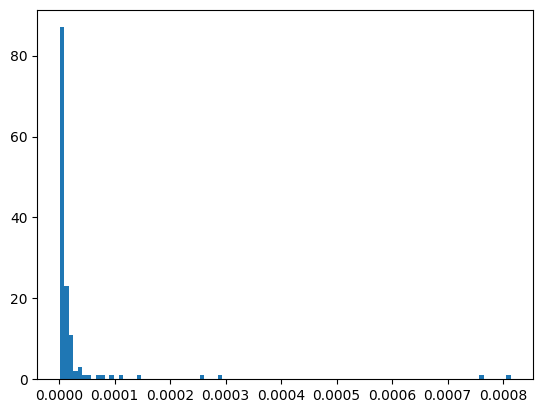

In [9]:
plt.hist(np.array(flattened_peak_values), bins = 100);

In [10]:
edges_dend = sm.get_edges(na_lower_bounds, "dend")
edges_apic = sm.get_edges(na_lower_bounds, "apic")

In [11]:
edges_dend = np.zeros(11)

In [12]:
na_dend = sm.get_sta(sm.soma_spiketimes, na_lower_bounds, edges_dend, "dend")
na_apic = sm.get_sta(sm.soma_spiketimes, na_lower_bounds, edges_apic, "apic")

In [13]:
rand_spktimes = np.sort(np.random.choice(np.arange(0, 150000), sm.soma_spiketimes.shape[0]))
na_dend_rand = sm.get_sta(rand_spktimes, na_lower_bounds, edges_dend, "dend")
na_apic_rand = sm.get_sta(rand_spktimes, na_lower_bounds, edges_apic, "apic")

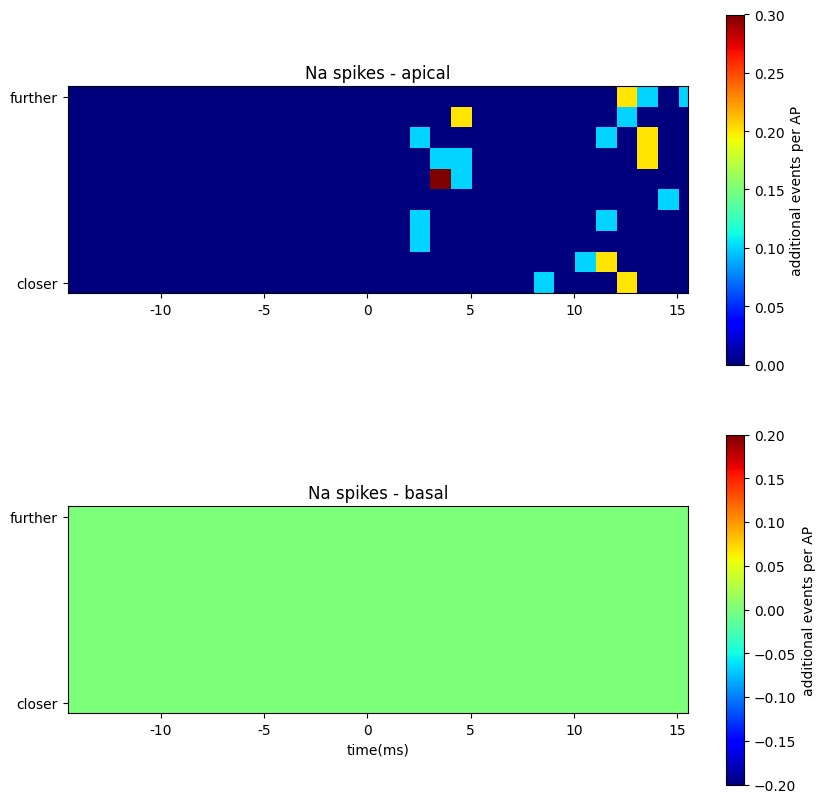

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Na spikes - apical')
plt.imshow((na_apic-na_apic_rand)/len(sm.soma_spiketimes),cmap='jet')
plt.colorbar(label='additional events per AP')
plt.xticks(ticks=np.arange(0,40,5)-0.5,labels=['{}'.format(i) for i in np.arange(-20,20,5)])
plt.yticks(ticks=[0,9],labels=['further','closer'])
plt.xlim(5,35)

plt.subplot(2,1,2)
plt.title('Na spikes - basal')
plt.imshow((na_dend-na_dend_rand)/len(sm.soma_spiketimes),cmap='jet',vmin=-0.2, vmax=0.2)
plt.colorbar(label='additional events per AP')
plt.xticks(ticks=np.arange(0,40,5)-0.5,labels=['{}'.format(i) for i in np.arange(-20,20,5)])
plt.yticks(ticks=[0,9],labels=['further','closer'])
plt.xlabel('time(ms)')
plt.xlim(5,35)

plt.show()

In [15]:
lowery, uppery = 500, 1500

In [16]:
ca_lower_bounds, _, _, _, _, _ = sm.get_ca_lower_bounds_durations_and_peaks(lowery, uppery)

In [17]:
edges_ca = sm.get_edges(ca_lower_bounds)
ca_apic = sm.get_sta(sm.soma_spiketimes, ca_lower_bounds, edges_ca, "apic")
rand_spktimes = np.sort(np.random.choice(np.arange(0,150000), sm.soma_spiketimes.shape[0]))
ca_apic_rand = sm.get_sta(rand_spktimes, ca_lower_bounds, edges_ca, "apic")

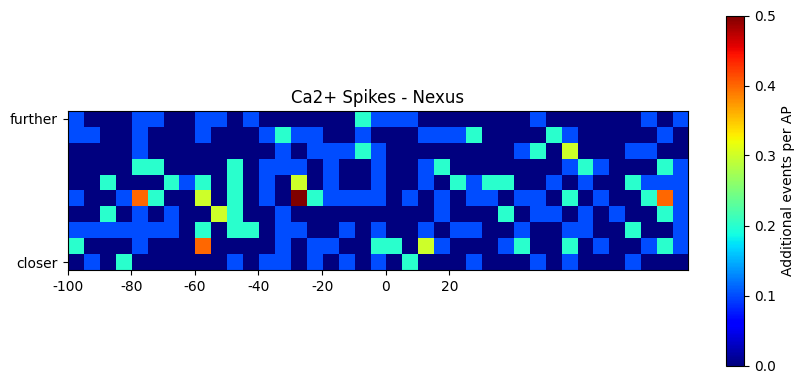

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Ca2+ Spikes - Nexus')
plt.imshow((ca_apic-ca_apic_rand)/len(sm.soma_spiketimes),cmap='jet')
# plt.imshow((ca_apic-ca_apic_rand)/len(spktimes),cmap='jet',vmin=-1.5,vmax=1.5)
# plt.imshow((ca_apic-ca_apic_rand)/len(spiketimes),cmap='jet',vmin=None,vmax=None)
# plt.xticks(ticks=np.arange(0,40,2)-0.5,labels=['{}'.format(i) for i in np.arange(-20,20,2)])
plt.xticks(ticks=np.arange(0,26,4)-0.5,labels=['{}'.format(i) for i in np.arange(-100,40,20)])
plt.colorbar(label='Additional events per AP')
# plt.yticks(ticks=[0,9],labels=['further','closer'])
plt.yticks(ticks=[0,9],labels=['further','closer'])
plt.savefig(output_folder+'/DetailedCaSpikes.png')
plt.show()

In [19]:
nmda_lower_bounds, _, _, _, _, _ = sm.get_ca_lower_bounds_durations_and_peaks(lowery, uppery)

In [20]:
edges_nmda_apic = sm.get_edges(nmda_lower_bounds, "apic")
nmda_apic = sm.get_sta(sm.soma_spiketimes, nmda_lower_bounds, edges_nmda_apic, "apic")
rand_spktimes_apic = np.sort(np.random.choice(np.arange(0, 150000), sm.soma_spiketimes.shape[0]))
nmda_rand_apic = sm.get_sta(rand_spktimes_apic, nmda_lower_bounds, edges_nmda_apic, "apic")

In [21]:
edges_nmda_dend = sm.get_edges(nmda_lower_bounds, "dend")
nmda_dend = sm.get_sta(sm.soma_spiketimes, nmda_lower_bounds, edges_nmda_dend, "dend")
rand_spktimes_dend = np.sort(np.random.choice(np.arange(0, 150000), sm.soma_spiketimes.shape[0]))
nmda_rand_dend = sm.get_sta(rand_spktimes_dend, nmda_lower_bounds, edges_nmda_dend, "dend")

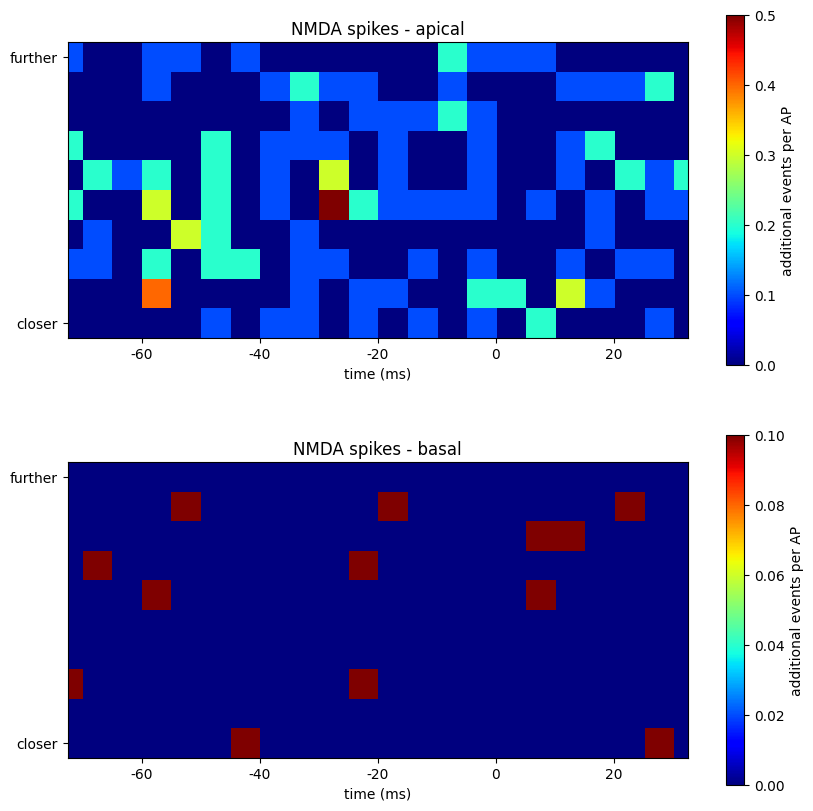

In [22]:
plt.figure(num=3,figsize=(10,10))
plt.subplot(2,1,1)
plt.title('NMDA spikes - apical')
plt.imshow((nmda_apic-nmda_rand_apic)/len(sm.soma_spiketimes),cmap='jet')
plt.xticks(ticks=np.arange(0,26,4)-0.5,labels=['{}'.format(i) for i in np.arange(-100,40,20)])
plt.yticks(ticks=[0,9],labels=['further','closer'])
#plt.yticks(ticks=[0,9],labels=[str(segs_nmda_df[segs_nmda_df.Type=='apic']['Elec_distance'].max()),str(segs_nmda_df[segs_nmda_df.Type=='apic']['Elec_distance'].min())])
plt.colorbar(label='additional events per AP')
plt.xlabel('time (ms)')
plt.xlim(5,26)

plt.subplot(2,1,2)
plt.title('NMDA spikes - basal')
plt.imshow((nmda_dend-nmda_rand_dend)/len(sm.soma_spiketimes),cmap='jet')
plt.xticks(ticks=np.arange(0,26,4)-0.5,labels=['{}'.format(i) for i in np.arange(-100,40,20)])
plt.yticks(ticks=[0,9],labels=['further','closer'])
#plt.yticks(ticks=[0,9],labels=[str(segs_nmda_df[segs_nmda_df.Type=='dend']['Elec_distance'].max()),str(segs_nmda_df[segs_nmda_df.Type=='dend']['Elec_distance'].min())])
plt.colorbar(label='additional events per AP')
plt.xlim(5,26)

plt.xlabel('time (ms)')
plt.show(plt.figure(num=3)) #test